<a href="https://colab.research.google.com/github/SaadOjo/Circle-Detection/blob/main/Circle_Detection_and_Localization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import cv2

In [ ]:
def add_square(img, center, width):
  start_point = (center[0]-width, center[1]-width)
  end_point   = (center[0]+width, center[1]+width)
  cv2.rectangle(img, start_point, end_point, random_color(),cv2.FILLED)

In [ ]:
def create_data_sample(num_shapes, height, width):
  img = np.zeros((height, width, 3))
  label = np.zeros((height, width, 1))
  for _ in range(num_shapes):
    x = int(np.random.rand()*width)
    y = int(np.random.rand()*height)
    if np.random.rand() > 0.5:
      cv2.circle(img, (x,y), int(np.ceil(width*0.05)), random_color(), cv2.FILLED)
      cv2.circle(label, (x,y), int(np.ceil(width*0.02)), (1,1,1), cv2.FILLED)
    else: 
      add_square(img, (x,y), int(np.ceil(width*0.05*0.7)))
  return img, label


In [ ]:
def test_batch(num_shapes, height, width):
  img, label = create_data_sample(num_shapes, height, width)
  return np.expand_dims(img,0), np.expand_dims(label,0)

In [ ]:
def grayscale_image(img):
  return np.expand_dims((img[:,:,0] + img[:,:,1] + img[:,:,2])/3,2)

In [ ]:
# (128,128,1) --> (128,128,3)
def to_three_channels(img):
  return np.squeeze(np.stack((img,img,img), 2))

In [ ]:
def random_color():
  return np.random.rand(3)

In [ ]:
def show_sample(img, label):
  figure, axis = plt.subplots(1,2)
  axis[0].imshow(img)
  axis[1].imshow(to_three_channels(label))

In [ ]:
def show_batch(img, label):
  show_sample(img[0,:,:,:],label[0,:,:,:])

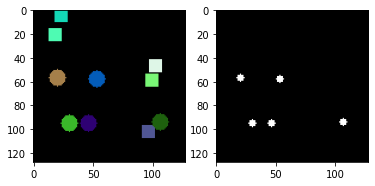

In [ ]:
img_shape = (128,128,3)
img, label = create_data_sample(10, img_shape[0], img_shape[1])
show_sample(img, label)

(1, 128, 128, 3) (1, 128, 128, 1)


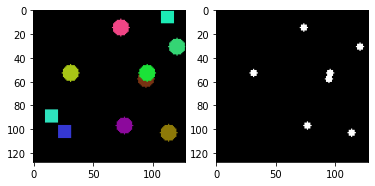

In [ ]:
img, label = test_batch(10, img_shape[0], img_shape[1])
print(img.shape, label.shape)
show_batch(img, label)

In [ ]:
#l2 = keras.regularizers.l2(1e-5)
l2 = None
inputs = keras.Input(shape=img_shape)
conv1 = keras.layers.Conv2D(16,5,padding='same',activation='relu',kernel_initializer='glorot_normal',kernel_regularizer=l2)(inputs)
conv1 = keras.layers.BatchNormalization(momentum=0.99)(conv1)
conv2 = keras.layers.Conv2D(32,5,padding='same',activation='relu',kernel_initializer='glorot_normal',kernel_regularizer=l2)(conv1)
conv2 = keras.layers.BatchNormalization(momentum=0.99)(conv2)
outputs = keras.layers.Conv2D(1,5,padding='same',activation='relu',kernel_initializer='glorot_normal',kernel_regularizer=l2)(conv2)
model = keras.Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 128, 128, 16)      1216      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 16)      64        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 32)      12832     
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 128, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 1)       801       
Total params: 15,041
Trainable params: 14,945
Non-trainable params: 96
_________________________________________________

In [ ]:
def loss_function(y_true, y_pred):
  squared_diff = tf.square(y_true - y_pred)
  return tf.reduce_mean(squared_diff)


In [ ]:
x_list = []
y_list = []
for i in range(1000):
  x,y  = create_data_sample(10, img_shape[0], img_shape[1])
  x_list.append(x)
  y_list.append(y)
x_list = np.array(x_list)
y_list = np.array(y_list)

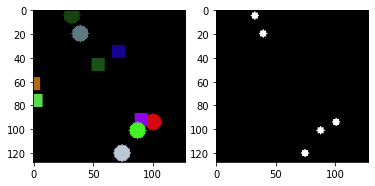

In [ ]:
i = 3
show_sample(x_list[i], y_list[i])

In [ ]:
x_list.shape

(1000, 128, 128, 3)

In [ ]:
opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(optimizer=opt,loss=loss_function)

In [ ]:

model.fit(x_list,y_list,batch_size=100,epochs=100)

Epoch 1/100
10/10 [==============================] - 0s 49ms/step - loss: 0.6497
Epoch 2/100
10/10 [==============================] - 1s 56ms/step - loss: 0.2778
Epoch 3/100
10/10 [==============================] - 1s 55ms/step - loss: 0.2268
Epoch 4/100
10/10 [==============================] - 1s 57ms/step - loss: 0.1635
Epoch 5/100
10/10 [==============================] - 1s 55ms/step - loss: 0.1359
Epoch 6/100
10/10 [==============================] - 1s 56ms/step - loss: 0.1159
Epoch 7/100
10/10 [==============================] - 1s 55ms/step - loss: 0.1004
Epoch 8/100
10/10 [==============================] - 1s 56ms/step - loss: 0.0882
Epoch 9/100
10/10 [==============================] - 1s 56ms/step - loss: 0.0782
Epoch 10/100
10/10 [==============================] - 1s 55ms/step - loss: 0.0699
Epoch 11/100
10/10 [==============================] - 1s 56ms/step - loss: 0.0628
Epoch 12/100
10/10 [==============================] - 1s 55ms/step - loss: 0.0567
Epoch 13/100
10/10 [=====

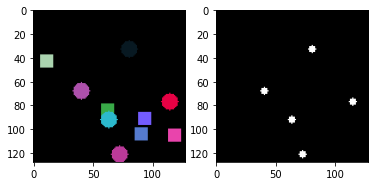

In [ ]:
img, label = test_batch(10, img_shape[0], img_shape[1])
show_batch(img,label)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


1.5814799


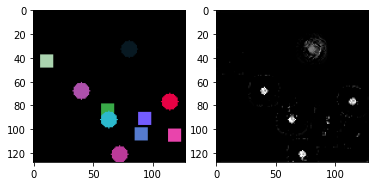

In [ ]:
y_pred = model.predict(img)
print(y_pred.max())
show_batch(img, y_pred)

In [ ]:
loss_function(y_pred, label)

<tf.Tensor: shape=(1, 128, 128), dtype=float64, numpy=
array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])>